**Machine Learning**

- Classify the customers that has a high probability of exiting

**Conclusion**
- KNN Scaled tuned is very good model in machine learning for Bank Customer Churn Classification with highest recall
- Random Forest Classifier tuned is very good model in machine learning for Bank Customer Churn Classification with highest precision



- KNN Scaled tuned might be good, but could be too costly
- Random Forest Classifier Tuned might be the best, it still has a relatively good recall, with much better precision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Preprocessing**

Drop Column

In [3]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

Encoding

In [4]:
df['Gender'] = df['Gender'].map({
    'Male' : 0,
    'Female' : 1
})

In [5]:
df = pd.get_dummies(data=df, columns=['Geography'])

Age is not binned to get better machine learning

In [6]:
# age_bin = [18, 40, 65, df['Age'].max()]
# labels = ['Young Adult', 'Senior', 'Elder']
# df['age_bin'] = pd.cut(df['Age'], bins=age_bin, labels = labels)
# ((df[['age_bin', 'Exited']].groupby(['age_bin']).mean())*100).sort_values(by='Exited', ascending=False)
# df = pd.get_dummies(data=df, columns=['age_bin'])
# df = df.drop(columns=['Age'])

**Splitting Data**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns='Exited')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90, stratify = y,random_state = 42)

**Checking Imbalance Dataset**

In [9]:
df_train = pd.concat([X_train, y_train], axis=1)

In [10]:
df_train['Exited'].value_counts()

0    7167
1    1833
Name: Exited, dtype: int64

**Over Sampled**

In [11]:
from sklearn.utils import resample

In [12]:
exited_no = df_train[df_train['Exited'] == 0]
exited_yes = df_train[df_train['Exited'] == 1]

exited_oversample = resample(exited_yes,
                           replace=True,
                           n_samples = len(exited_no),
                           random_state = 42)

In [13]:
df_OverSampled = pd.concat([exited_no, exited_oversample])

df_OverSampled['Exited'].value_counts()

1    7167
0    7167
Name: Exited, dtype: int64

In [14]:
df = df_OverSampled

**Machine Learning Preprocessing**

Define Oversampled Train

In [15]:
X_train = df.drop(columns='Exited')
y_train = df['Exited']

**Scaling**

Creating Variable for Scaled Data

In [16]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler

scaling = StandardScaler()
scaled1 = scaling.fit_transform(X_train)
scaled2 = scaling.fit_transform(X_test)

**Machine Learning**

**LogReg**

In [17]:
from sklearn.linear_model import LogisticRegression

modelLog = LogisticRegression()
modelLog.fit(X_train, y_train)
modelLog.score(X_test, y_test)
modelLog.predict(X_test)


print('Model Log Score :',modelLog.score(X_test, y_test))

Model Log Score : 0.648


**KNN**

In [18]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)
modelKNN.score(X_test, y_test)
modelKNN.predict(X_test)

print('Model KNN Score :',modelKNN.score(X_test, y_test))

Model KNN Score : 0.584


KNN Scaled

In [19]:
modelKNN2 = KNeighborsClassifier()
modelKNN2.fit(scaled1, y_train)
modelKNN2.score(scaled2, y_test)
modelKNN2.predict(scaled2)

print('Model KNN Score :',modelKNN2.score(scaled2, y_test))

Model KNN Score : 0.709


**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
modelRF.score(X_test, y_test)
modelRF.predict(X_test)

print('Model RF Score :',modelRF.score(X_test, y_test))

Model RF Score : 0.85


**SVC**

In [21]:
from sklearn.svm import SVC

modelSVC = SVC(max_iter = 2000, cache_size=1000)
modelSVC.fit(X_train, y_train)
modelSVC.score(X_test, y_test)
modelSVC.predict(X_test)

print('Model SVC Score :',modelSVC.score(X_test, y_test))

Model SVC Score : 0.397


SVC Scaled

In [22]:
modelSVC2 = SVC(max_iter = 2000, cache_size=1000)
modelSVC2.fit(scaled1, y_train)
modelSVC2.score(scaled2, y_test)
modelSVC2.predict(scaled2)

print('Model SVC Score :',modelSVC2.score(scaled2, y_test))

Model SVC Score : 0.545


**Metrics**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [24]:
y_pred_Logtr = modelLog.predict(X_train)
acc_Logtr = accuracy_score(y_train, y_pred_Logtr)
prec_Logtr = precision_score(y_train, y_pred_Logtr)
rec0_Logtr = recall_score (y_train, y_pred_Logtr, pos_label=0)
rec1_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=1)
f1_Logtr = f1_score(y_train, y_pred_Logtr)

y_pred_KNNtr = modelKNN.predict(X_train)
acc_KNNtr = accuracy_score(y_train, y_pred_KNNtr)
prec_KNNtr = precision_score(y_train, y_pred_KNNtr)
rec0_KNNtr = recall_score (y_train, y_pred_KNNtr, pos_label=0)
rec1_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=1)
f1_KNNtr = f1_score(y_train, y_pred_KNNtr)

y_pred_KNN2tr = modelKNN2.predict(scaled1)
acc_KNN2tr = accuracy_score(y_train, y_pred_KNN2tr)
prec_KNN2tr = precision_score(y_train, y_pred_KNN2tr)
rec0_KNN2tr = recall_score (y_train, y_pred_KNN2tr, pos_label=0)
rec1_KNN2tr = recall_score(y_train, y_pred_KNN2tr, pos_label=1)
f1_KNN2tr = f1_score(y_train, y_pred_KNN2tr)

y_pred_RFtr = modelRF.predict(X_train)
acc_RFtr = accuracy_score(y_train, y_pred_RFtr)
prec_RFtr = precision_score(y_train, y_pred_RFtr)
rec0_RFtr = recall_score (y_train, y_pred_RFtr, pos_label=0)
rec1_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=1)
f1_RFtr = f1_score(y_train, y_pred_RFtr)

y_pred_SVCtr = modelSVC.predict(X_train)
acc_SVCtr = accuracy_score(y_train, y_pred_SVCtr)
prec_SVCtr = precision_score(y_train, y_pred_SVCtr)
rec0_SVCtr = recall_score (y_train, y_pred_SVCtr, pos_label=0)
rec1_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=1)
f1_SVCtr = f1_score(y_train, y_pred_SVCtr)

y_pred_SVC2tr = modelSVC2.predict(scaled1)
acc_SVC2tr = accuracy_score(y_train, y_pred_SVC2tr)
prec_SVC2tr = precision_score(y_train, y_pred_SVC2tr)
rec0_SVC2tr = recall_score (y_train, y_pred_SVC2tr, pos_label=0)
rec1_SVC2tr = recall_score(y_train, y_pred_SVC2tr, pos_label=1)
f1_SVC2tr = f1_score(y_train, y_pred_SVC2tr)


y_pred_Logts = modelLog.predict(X_test)
acc_Logts = accuracy_score(y_test, y_pred_Logts)
prec_Logts = precision_score(y_test, y_pred_Logts)
rec0_Logts = recall_score (y_test, y_pred_Logts, pos_label=0)
rec1_Logts = recall_score(y_test, y_pred_Logts, pos_label=1)
f1_Logts = f1_score(y_test, y_pred_Logts)

y_pred_KNNts = modelKNN.predict(X_test)
acc_KNNts = accuracy_score(y_test, y_pred_KNNts)
prec_KNNts = precision_score(y_test, y_pred_KNNts)
rec0_KNNts = recall_score (y_test, y_pred_KNNts, pos_label=0)
rec1_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=1)
f1_KNNts = f1_score(y_test, y_pred_KNNts)

y_pred_KNN2ts = modelKNN2.predict(scaled2)
acc_KNN2ts = accuracy_score(y_test, y_pred_KNN2ts)
prec_KNN2ts = precision_score(y_test, y_pred_KNN2ts)
rec0_KNN2ts = recall_score (y_test, y_pred_KNN2ts, pos_label=0)
rec1_KNN2ts = recall_score(y_test, y_pred_KNN2ts, pos_label=1)
f1_KNN2ts = f1_score(y_test, y_pred_KNN2ts)

y_pred_RFts = modelRF.predict(X_test)
acc_RFts = accuracy_score(y_test, y_pred_RFts)
prec_RFts = precision_score(y_test, y_pred_RFts)
rec0_RFts = recall_score (y_test, y_pred_RFts, pos_label=0)
rec1_RFts = recall_score(y_test, y_pred_RFts, pos_label=1)
f1_RFts = f1_score(y_test, y_pred_RFts)

y_pred_SVCts = modelSVC.predict(X_test)
acc_SVCts = accuracy_score(y_test, y_pred_SVCts)
prec_SVCts = precision_score(y_test, y_pred_SVCts)
rec0_SVCts = recall_score (y_test, y_pred_SVCts, pos_label=0)
rec1_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=1)
f1_SVCts = f1_score(y_test, y_pred_SVCts)

y_pred_SVC2ts = modelSVC2.predict(scaled2)
acc_SVC2ts = accuracy_score(y_test, y_pred_SVC2ts)
prec_SVC2ts = precision_score(y_test, y_pred_SVC2ts)
rec0_SVC2ts = recall_score (y_test, y_pred_SVC2ts, pos_label=0)
rec1_SVC2ts = recall_score(y_test, y_pred_SVC2ts, pos_label=1)
f1_SVC2ts = f1_score(y_test, y_pred_SVC2ts)

In [25]:
data = {
    "LogReg Train" : [acc_Logtr, prec_Logtr, rec1_Logtr, f1_Logtr],
    "LogReg Test" : [acc_Logts, prec_Logts, rec1_Logts, f1_Logts],
    "KNN Train" : [acc_KNNtr, prec_KNNtr, rec1_KNNtr, f1_KNNtr],
    "KNN Test" : [acc_KNNts, prec_KNNts, rec1_KNNts, f1_KNNts],
    "KNN Train S" : [acc_KNN2tr, prec_KNN2tr, rec1_KNN2tr, f1_KNN2tr],
    "KNN Test S" : [acc_KNN2ts, prec_KNN2ts, rec1_KNN2ts, f1_KNN2ts],
    "RF Train" : [acc_RFtr, prec_RFtr, rec1_RFtr, f1_RFtr],
    "RF Test" : [acc_RFts, prec_RFts, rec1_RFts, f1_RFts],
    "SVC Train" : [acc_SVCtr, prec_SVCtr, rec1_SVCtr, f1_SVCtr],
    "SVC Test" : [acc_SVCts, prec_SVCts, rec1_SVCts, f1_SVCts],
    "SVC Train S" : [acc_SVC2tr, prec_SVC2tr, rec1_SVC2tr, f1_SVC2tr],
    "SVC Test S" : [acc_SVC2ts, prec_SVC2ts, rec1_SVC2ts, f1_SVC2ts]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,KNN Train S,KNN Test S,RF Train,RF Test,SVC Train,SVC Test,SVC Train S,SVC Test S
Accuracy,0.662620,0.648000,0.829496,0.584000,0.898354,0.709000,1.0,0.850000,0.532998,0.397000,0.718990,0.545000
Precision,0.659156,0.323810,0.766445,0.238916,0.849364,0.378151,1.0,0.670886,0.524086,0.212950,0.665786,0.295269
Recall,0.673504,0.666667,0.947816,0.475490,0.968467,0.661765,1.0,0.519608,0.718013,0.725490,0.879447,0.887255
F1 Score,0.666253,0.435897,0.847536,0.318033,0.905013,0.481283,1.0,0.585635,0.605911,0.329255,0.757845,0.443084


**Hyperparameter Tuning**

Parameter

In [26]:
Param_Log = {
    "penalty" : ["l1","l2","elasticnet","none"],
    "class_weight" : [dict, "balanced"],
    "max_iter" : [10,100,500],
    "intercept_scaling" : [1,5,10]
}

Param_KNN = {
    "n_neighbors" : [1,3,5],
    "weights" : ["distance","uniform"],
    "leaf_size" : [1,5,15]
}

Param_RF = {
    "n_estimators" : [50,300,1000],
     #"max_depth" : [8],
     "min_samples_split" : [2,5,10],
     "min_samples_leaf" : [1,2,5]
}

Param_SVC = {
    "max_iter" : [100,2000],
    "kernel" : ['poly', 'rbf', 'sigmoid'],
    "cache_size" : [2000],
}

**Hyperparameter Tuning**

In [27]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression Tuning**

In [28]:
model_tuned_1 = GridSearchCV(estimator=modelLog, param_grid=Param_Log, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_1.fit(X_train, y_train)
model_tuned_1.best_score_
model_tuned_1_1 = model_tuned_1.best_estimator_
y_tune_1_train = model_tuned_1_1.predict(X_train)
y_tune_1_test = model_tuned_1_1.predict(X_test)

print('Best Score :',model_tuned_1.best_score_)
print('Tuned recall LogReg Tuned Train : ', recall_score(y_train, y_tune_1_train))
print('Tuned recall LogReg Tuned Test : ', recall_score(y_test, y_tune_1_test))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s


Best Score : 0.6980605553230083
Tuned recall LogReg Tuned Train :  0.6973629133528673
Tuned recall LogReg Tuned Test :  0.696078431372549


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    3.3s finished


**KNN Tuning**

In [29]:
model_tuned_2 = GridSearchCV(estimator=modelKNN, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_2.fit(X_train, y_train)
model_tuned_2.best_score_
model_tuned_2_1 = model_tuned_2.best_estimator_
y_tune_2_train = model_tuned_2_1.predict(X_train)
y_tune_2_test = model_tuned_2_1.predict(X_test)

print('Best Score :',model_tuned_2.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2_train))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.5s finished


Best Score : 0.9464210966931771
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.4362745098039216


KNN Scaled Tuning

In [30]:
model_tuned_2S = GridSearchCV(estimator=modelKNN2, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_2S.fit(scaled1, y_train)
model_tuned_2S.best_score_
model_tuned_2_1S = model_tuned_2S.best_estimator_
y_tune_2S_train = model_tuned_2_1S.predict(scaled1)
y_tune_2S_test = model_tuned_2_1S.predict(scaled2)

print('Best Score :',model_tuned_2S.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2S_train))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2S_test))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    5.3s finished


Best Score : 0.973629133528673
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.6617647058823529


**Random Forest Tuning**

In [31]:
model_tuned_3 = GridSearchCV(estimator=modelRF, param_grid=Param_RF, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_3.fit(X_train, y_train)
model_tuned_3.best_score_
model_tuned_3_1 = model_tuned_3.best_estimator_
y_tune_3_train = model_tuned_3_1.predict(X_train)
y_tune_3_test = model_tuned_3_1.predict(X_test)

print('Best Score :',model_tuned_3.best_score_)
print('Tuned recall RF Tuned Train : ', recall_score(y_train, y_tune_3_train))
print('Tuned recall RF Tuned Test : ', recall_score(y_test, y_tune_3_test))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.3min finished


Best Score : 0.9648388447048974
Tuned recall RF Tuned Train :  1.0
Tuned recall RF Tuned Test :  0.5294117647058824


**SVC Tuning**

In [32]:
model_tuned_4 = GridSearchCV(estimator=modelSVC, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_4.fit(X_train, y_train)
model_tuned_4.best_score_
model_tuned_4_1 = model_tuned_4.best_estimator_
y_tune_4_train = model_tuned_4_1.predict(X_train)
y_tune_4_test = model_tuned_4_1.predict(X_test)

print('Best Score :',model_tuned_4.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4_train))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Best Score : 0.9432119436305287
Tuned recall SVC Tuned Train :  0.9367936375052324
Tuned recall SVC Tuned Test :  0.9362745098039216


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.3s finished


SVC Scaled Tuning

In [33]:
model_tuned_4S = GridSearchCV(estimator=modelSVC2, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1, scoring='recall')

model_tuned_4S.fit(scaled1, y_train)
model_tuned_4S.best_score_
model_tuned_4_1S = model_tuned_4S.best_estimator_
y_tune_4S_train = model_tuned_4_1S.predict(scaled1)
y_tune_4S_test = model_tuned_4_1S.predict(scaled2)

print('Best Score :',model_tuned_4S.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4S_train))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4S_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.8s finished


Best Score : 0.9648388447048974
Tuned recall SVC Tuned Train :  0.922980326496442
Tuned recall SVC Tuned Test :  0.9362745098039216


**Evaluation Metrics Tuned**

In [34]:
acc_Logtr_tuned = accuracy_score(y_train, y_tune_1_train)
prec_Logtr_tuned = precision_score(y_train, y_tune_1_train)
rec0_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=0)
rec1_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=1)
f1_Logtr_tuned = f1_score(y_train, y_tune_1_train)

acc_KNNtr_tuned = accuracy_score(y_train, y_tune_2_train)
prec_KNNtr_tuned = precision_score(y_train, y_tune_2_train)
rec0_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=0)
rec1_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=1)
f1_KNNtr_tuned = f1_score(y_train, y_tune_2_train)

acc_KNN2tr_tuned = accuracy_score(y_train, y_tune_2S_train)
prec_KNN2tr_tuned = precision_score(y_train, y_tune_2S_train)
rec0_KNN2tr_tuned = recall_score(y_train, y_tune_2S_train, pos_label=0)
rec1_KNN2tr_tuned = recall_score(y_train, y_tune_2S_train, pos_label=1)
f1_KNN2tr_tuned = f1_score(y_train, y_tune_2S_train)

acc_RFtr_tuned = accuracy_score(y_train, y_tune_3_train)
prec_RFtr_tuned = precision_score(y_train, y_tune_3_train)
rec0_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=0)
rec1_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=1)
f1_RFtr_tuned = f1_score(y_train, y_tune_3_train)

acc_SVCtr_tuned = accuracy_score(y_train, y_tune_4_train)
prec_SVCtr_tuned = precision_score(y_train, y_tune_4_train)
rec0_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=0)
rec1_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=1)
f1_SVCtr_tuned = f1_score(y_train, y_tune_4_train)

acc_SVC2tr_tuned = accuracy_score(y_train, y_tune_4S_train)
prec_SVC2tr_tuned = precision_score(y_train, y_tune_4S_train)
rec0_SVC2tr_tuned = recall_score(y_train, y_tune_4S_train, pos_label=0)
rec1_SVC2tr_tuned = recall_score(y_train, y_tune_4S_train, pos_label=1)
f1_SVC2tr_tuned = f1_score(y_train, y_tune_4S_train)



acc_Logts_tuned = accuracy_score(y_test, y_tune_1_test)
prec_Logts_tuned = precision_score(y_test, y_tune_1_test)
rec0_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=0)
rec1_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=1)
f1_Logts_tuned = f1_score(y_test, y_tune_1_test)

acc_KNNts_tuned = accuracy_score(y_test, y_tune_2_test)
prec_KNNts_tuned = precision_score(y_test, y_tune_2_test)
rec0_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=0)
rec1_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=1)
f1_KNNts_tuned = f1_score(y_test, y_tune_2_test)

acc_KNN2ts_tuned = accuracy_score(y_test, y_tune_2S_test)
prec_KNN2ts_tuned = precision_score(y_test, y_tune_2S_test)
rec0_KNN2ts_tuned = recall_score(y_test, y_tune_2S_test, pos_label=0)
rec1_KNN2ts_tuned = recall_score(y_test, y_tune_2S_test, pos_label=1)
f1_KNN2ts_tuned = f1_score(y_test, y_tune_2S_test)

acc_RFts_tuned = accuracy_score(y_test, y_tune_3_test)
prec_RFts_tuned = precision_score(y_test, y_tune_3_test)
rec0_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=0)
rec1_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=1)
f1_RFts_tuned = f1_score(y_test, y_tune_3_test)

acc_SVCts_tuned = accuracy_score(y_test, y_tune_4_test)
prec_SVCts_tuned = precision_score(y_test, y_tune_4_test)
rec0_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=0)
rec1_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=1)
f1_SVCts_tuned = f1_score(y_test, y_tune_4_test)

acc_SVC2ts_tuned = accuracy_score(y_test, y_tune_4S_test)
prec_SVC2ts_tuned = precision_score(y_test, y_tune_4S_test)
rec0_SVC2ts_tuned = recall_score(y_test, y_tune_4S_test, pos_label=0)
rec1_SVC2ts_tuned = recall_score(y_test, y_tune_4S_test, pos_label=1)
f1_SVC2ts_tuned = f1_score(y_test, y_tune_4S_test)

In [35]:
data = {
    "LogReg Tuned Train" : [acc_Logtr_tuned, prec_Logtr_tuned, rec1_Logtr_tuned, f1_Logtr_tuned],
    "LogReg Tuned Test" : [acc_Logts_tuned, prec_Logts_tuned, rec1_Logts_tuned, f1_Logts_tuned],
    "KNN Tuned Train" : [acc_KNNtr_tuned, prec_KNNtr_tuned, rec1_KNNtr_tuned, f1_KNNtr_tuned],
    "KNN Tuned Test" : [acc_KNNts_tuned, prec_KNNts_tuned, rec1_KNNts_tuned, f1_KNNts_tuned],
    "KNN Tuned Train S" : [acc_KNN2tr_tuned, prec_KNN2tr_tuned, rec1_KNN2tr_tuned, f1_KNN2tr_tuned],
    "KNN Tuned Test S" : [acc_KNN2ts_tuned, prec_KNN2ts_tuned, rec1_KNN2ts_tuned, f1_KNN2ts_tuned],
    "RF Tuned Train" : [acc_RFtr_tuned, prec_RFtr_tuned, rec1_RFtr_tuned, f1_RFtr_tuned],
    "RF Tuned Test" : [acc_RFts_tuned, prec_RFts_tuned, rec1_RFts_tuned, f1_RFts_tuned],
    "SVC Tuned Train" : [acc_SVCtr_tuned, prec_SVCtr_tuned, rec1_SVCtr_tuned, f1_SVCtr_tuned],
    "SVC Tuned Test" : [acc_SVCts_tuned, prec_SVCts_tuned, rec1_SVCts_tuned, f1_SVCts_tuned],
    "SVC Tuned Train S" : [acc_SVC2tr_tuned, prec_SVC2tr_tuned, rec1_SVC2tr_tuned, f1_SVC2tr_tuned],
    "SVC Tuned Test S" : [acc_SVC2ts_tuned, prec_SVC2ts_tuned, rec1_SVC2ts_tuned, f1_SVC2ts_tuned]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Tuned Train,LogReg Tuned Test,KNN Tuned Train,KNN Tuned Test,KNN Tuned Train S,KNN Tuned Test S,RF Tuned Train,RF Tuned Test,SVC Tuned Train,SVC Tuned Test,SVC Tuned Train S,SVC Tuned Test S
Accuracy,0.567322,0.498000,1.0,0.629000,1.0,0.713000,1.0,0.852000,0.492396,0.243000,0.529022,0.288000
Precision,0.553427,0.243986,1.0,0.257971,1.0,0.382436,1.0,0.675000,0.495974,0.204278,0.516232,0.214607
Recall,0.697363,0.696078,1.0,0.436275,1.0,0.661765,1.0,0.529412,0.936794,0.936275,0.922980,0.936275
F1 Score,0.617113,0.361323,1.0,0.324226,1.0,0.484740,1.0,0.593407,0.648570,0.335382,0.662129,0.349177


**Confusion Matrix**

In [36]:
cmLog = confusion_matrix(y_test, y_tune_1_test, labels=[1, 0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, y_tune_2_test, labels=[1, 0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN2 = confusion_matrix(y_test, y_tune_2S_test, labels=[1, 0])
dfKNN2 = pd.DataFrame(data=cmKNN2, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, y_tune_3_test, labels=[1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmSVC = confusion_matrix(y_test, y_tune_4_test, labels=[1, 0])
dfSVC = pd.DataFrame(data=cmSVC, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmSVC2 = confusion_matrix(y_test, y_tune_4S_test, labels=[1, 0])
dfSVC2 = pd.DataFrame(data=cmSVC2, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

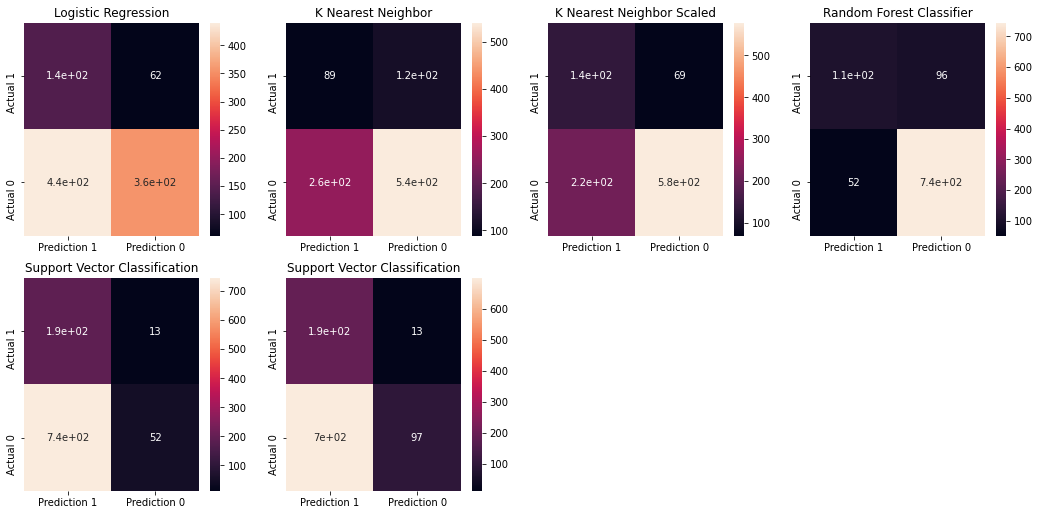

In [37]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True)
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True)
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfKNN2, annot=True)
plt.title('K Nearest Neighbor Scaled')

plt.subplot(4,4,4)
sns.heatmap(dfRF, annot=True)
plt.title('Random Forest Classifier')

plt.subplot(4,4,5)
sns.heatmap(dfSVC, annot=True)
plt.title('Support Vector Classification')

plt.subplot(4,4,6)
sns.heatmap(dfSVC2, annot=True)
plt.title('Support Vector Classification')

plt.show()

**Random Forest Classifier Tuned**

- Total customer exit prediction = 165
- Total customer exit = 207
- 
- Total right exit prediction = 110
- Total wrong exit prediction = 55

Focus : Recall, accompanied with good precision

In [38]:
import pickle
import joblib

joblib.dump(DTree, 'ModelBankAccount')

NameError: name 'DTree' is not defined